### Sheyam Bitar

Python: Heat Maps, Spatial Charts, and Lollipop Charts



In [1]:
import pandas as pd
import geopandas as gpd



In [2]:
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
from IPython.display import display



In [4]:
data = pd.read_csv('costcos-geocoded.csv')

In [5]:
# 1. Heat Map
m = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=5)

# Adding label
folium.Marker(
    [data['Latitude'].mean(), data['Longitude'].mean()],
    popup='Python Heat Map',
    icon=folium.Icon(color='red')
).add_to(m)

heat_data = [[row['Latitude'], row['Longitude']] for index, row in data.iterrows()]
HeatMap(heat_data).add_to(m)
m.save('heatmap.html')

# Display the heatmap
display(m)


C:\Users\sbita\AppData\Local\Temp\ipykernel_16944\2553198096.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


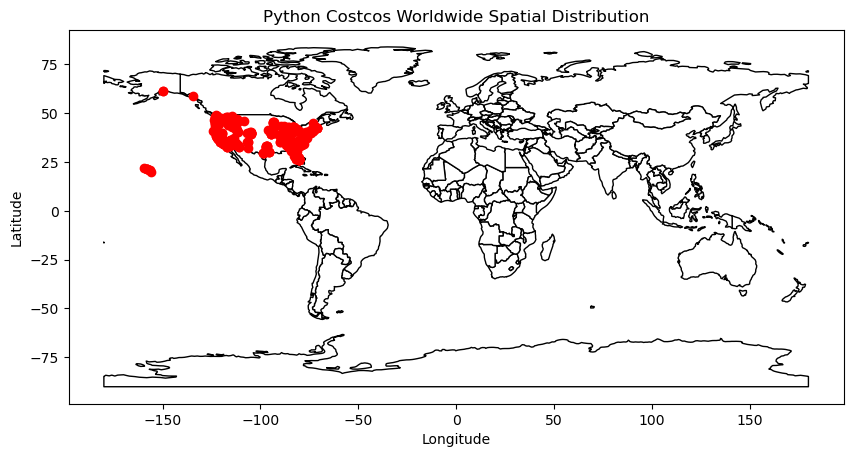

In [6]:
# 2. Spatial Chart
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 6), color='white', edgecolor='black')
gdf.plot(ax=ax, color='red')
plt.title('Python Costcos Worldwide Spatial Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


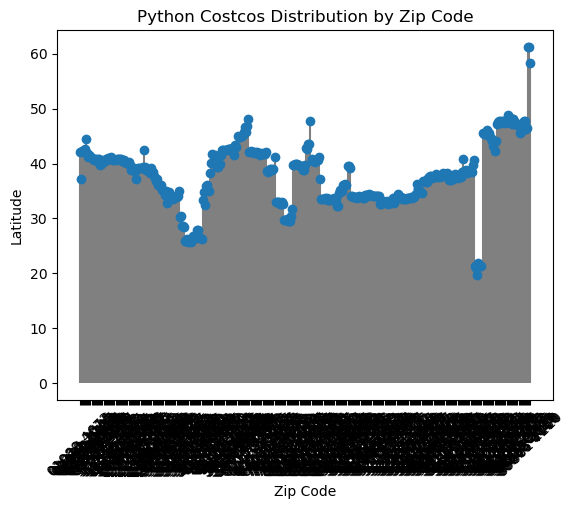

In [7]:
# 3. Lollipop Chart
data_sorted = data.sort_values(by='Zip Code', ascending=True)
plt.stem(data_sorted['Zip Code'], data_sorted['Latitude'], linefmt='grey', markerfmt='o', basefmt=' ')
plt.title('Python Costcos Distribution by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Latitude')
plt.xticks(rotation=45)
plt.show()

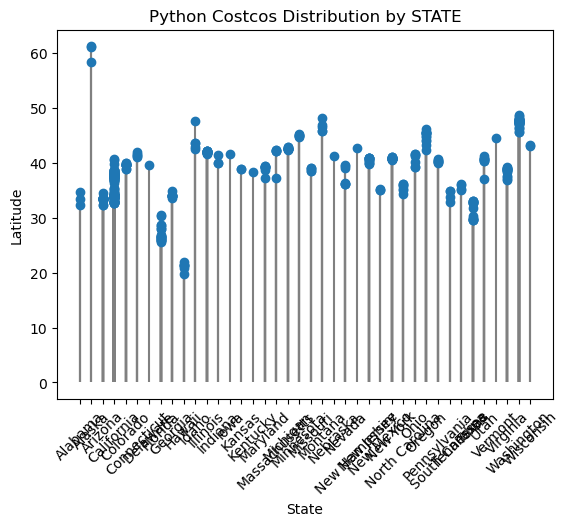

In [8]:
# 3. Lollipop Chart
data_sorted = data.sort_values(by='State', ascending=True)
plt.stem(data_sorted['State'], data_sorted['Latitude'], linefmt='grey', markerfmt='o', basefmt=' ')
plt.title('Python Costcos Distribution by STATE')
plt.xlabel('State')
plt.ylabel('Latitude')
plt.xticks(rotation=45)
plt.show()